In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sentimen Lexicon Final - Kampus 2.csv to Sentimen Lexicon Final - Kampus 2.csv


In [ ]:
import pandas as pd
import numpy as np

df_ktt = pd.read_csv('Sentimen Lexicon Final - Kampus 1.csv')
df_lw = pd.read_csv('Sentimen Lexicon Final - Kampus 2.csv')

df_ktt['review_clean'] = df_ktt['review_clean'].astype(str)
df_ktt['review_clean'] = df_ktt['review_clean'].fillna('')

df_lw['review_clean_lw'] = df_lw['review_clean_lw'].astype(str)
df_lw['review_clean_lw'] = df_lw['review_clean_lw'].fillna('')

In [ ]:
# Cek distribusi label
print(df_ktt['sentiment_fix'].value_counts())
print(df_lw['sentiment_fix'].value_counts())

sentiment_fix
positive    87
negative    13
Name: count, dtype: int64
sentiment_fix
positive    88
negative    12
Name: count, dtype: int64


## Split Data

In [ ]:
from sklearn.model_selection import train_test_split

X_trainktt, X_testktt, y_trainktt, y_testktt = train_test_split(
    df_ktt['review_clean'],
    df_ktt['sentiment_fix'],
    test_size=0.2,  # 20% data test dan 80% data train untuk model SVM
    random_state=42,
    stratify=df_ktt['sentiment_fix']
)

X_trainlw, X_testlw, y_trainlw, y_testlw = train_test_split(
    df_lw['review_clean_lw'],
    df_lw['sentiment_fix'],
    test_size=0.2,  # 20% data test dan 80% data train untuk model SVM
    random_state=42,
    stratify=df_lw['sentiment_fix']
)


## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Kampus 1
tfidf_ktt = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
tfidf_train_ktt = tfidf_ktt.fit_transform(X_trainktt)
tfidf_test_ktt = tfidf_ktt.transform(X_testktt)

# TF-IDFKampus 2
tfidf_lw = TfidfVectorizer(ngram_range=(1,2), max_features=10000)
tfidf_train_lw = tfidf_lw.fit_transform(X_trainlw)
tfidf_test_lw = tfidf_lw.transform(X_testlw)


# Modeling

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
svm_ktt = LinearSVC()
svm_ktt.fit(tfidf_train_ktt, y_trainktt)

svm_lw = LinearSVC()
svm_lw.fit(tfidf_train_lw, y_trainlw)

LinearSVC()

menggunakan model LinerSVC karena sering digunakan dalam text classification dibanding dengan kernel SVM lainnya seperti RBF, Polynomial, dll. Dan juga memiliki fitur sangat tinggi (hasil TF-IDF), sehingga model SVM dengan kernel linear adalah yang paling cepat, paling stabil, dan paling akurat.

# Testing/Evaluasi Model

In [ ]:
pred_ktt = svm_ktt.predict(tfidf_test_ktt)
pred_lw = svm_lw.predict(tfidf_test_lw)

In [ ]:
print("=== Evaluasi Kampus 1 (SVM) ===")
print(classification_report(y_testktt, pred_ktt))
print(confusion_matrix(y_testktt, pred_ktt))

=== Evaluasi Kampus 1 (SVM) ===
              precision    recall  f1-score   support

    negative       1.00      0.33      0.50         3
    positive       0.89      1.00      0.94        17

    accuracy                           0.90        20
   macro avg       0.95      0.67      0.72        20
weighted avg       0.91      0.90      0.88        20

[[ 1  2]
 [ 0 17]]


Evaluasi SVM pada Kampus 1 menunjukkan bahwa model mampu mengikuti pola pelabelan lexicon IndoBERT terutama pada kelas positif, terlihat dari recall positif yang sempurna (1.00). Namun, performanya masih lemah dalam mengenali ulasan negatif, di mana hanya 1 dari 3 data negatif yang berhasil diprediksi dengan benar. Meskipun akurasi keseluruhan mencapai 90%, nilai ini dipengaruhi oleh distribusi data yang tidak seimbang sehingga model lebih mudah mempelajari pola positif dibandingkan negatif. Dengan demikian, SVM belum sepenuhnya konsisten dengan hasil lexicon IndoBERT, khususnya pada kategori negatif yang jumlahnya sedikit.

In [ ]:
print("\n=== Evaluasi Kampus 2 (SVM) ===")
print(classification_report(y_testlw, pred_lw))
print(confusion_matrix(y_testlw, pred_lw))


=== Evaluasi Kampus 2 (SVM) ===
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         2
    positive       0.90      1.00      0.95        18

    accuracy                           0.90        20
   macro avg       0.45      0.50      0.47        20
weighted avg       0.81      0.90      0.85        20

[[ 0  2]
 [ 0 18]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hasil evaluasi untuk Kampus 2 menunjukkan bahwa model SVM mampu mengklasifikasikan kelas positive dengan sangat baik, terbukti dari precision 0.90, recall 1.00, dan f1-score 0.95 pada 18 data uji. Namun, model gagal mengenali kelas negative karena kedua sampel negative justru diprediksi sebagai positive. Akibatnya, metrik untuk kelas negative menjadi 0.00. Meski demikian, akurasi keseluruhan tetap tinggi (0.90) karena data uji sangat didominasi oleh kelas positive. Temuan ini menunjukkan bahwa model bias terhadap kelas mayoritas dan memerlukan penanganan ketidakseimbangan data jika ingin meningkatkan performa pada kelas negative.

# CONFUSION MATRIX

In [ ]:
def plot_confusion(cm, title, labels):
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

labels = sorted(df_ktt['sentiment_fix'].unique())

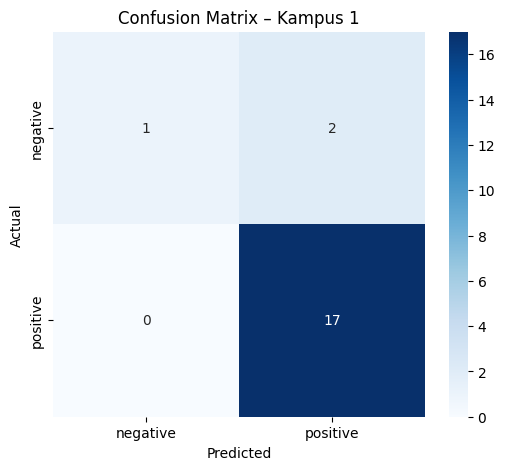

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kampus 1
plot_confusion(confusion_matrix(y_testktt, pred_ktt),
        "Confusion Matrix – Kampus 1", labels)

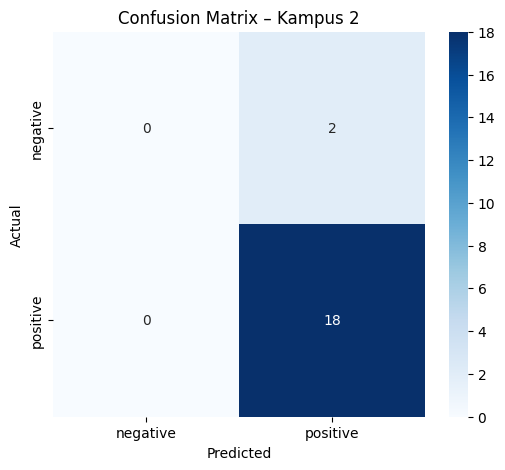

In [ ]:
#Kampus 2
plot_confusion(confusion_matrix(y_testlw, pred_lw),
        "Confusion Matrix – Kampus 2", labels)

In [ ]:
from sklearn.metrics import accuracy_score

print("Akurasi Lexicon Kampus 1:",
      accuracy_score(y_testktt, y_testktt))   # trivial = 1 (akan 1 jika y_test lexicon dipakai)


Akurasi Lexicon Kampus 1: 1.0


## cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross Validation Kampus 1
scores = cross_val_score(svm_ktt, tfidf_train_ktt, y_trainktt, cv=5)
print("CV Score KTT:", scores.mean())


CV Score KTT: 0.875


In [ ]:
# Cross Validation Kampus 1
scores = cross_val_score(svm_lw, tfidf_train_lw, y_trainlw, cv=5)
print("CV Score LW:", scores.mean())

CV Score LW: 0.875


Nilai 0.875 adalah rata-rata akurasi dari evaluasi data train. Artinya, performa model dalam membedakan kelas positive dan negative cukup stabil di berbagai skenario pembagian data, dengan akurasi rata-rata sekitar 87,5%.

# Visualisasi

In [ ]:
# Untuk KTT
df_pred_ktt = pd.DataFrame({
    'review_clean': X_testktt,
    'pred_sentiment': pred_ktt
})

# Untuk LW
df_pred_lw = pd.DataFrame({
    'review_clean': X_testlw,
    'pred_sentiment': pred_lw
})


## Kampus 1 Ketintang

### Wordclod

In [ ]:
from wordcloud import WordCloud
def wordcloud(df, sentiment_label):
    text = " ".join(df[df['pred_sentiment'] == sentiment_label]['review_clean'])
    wc = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Wordcloud - {sentiment_label.capitalize()}", fontsize=16)
    plt.show()

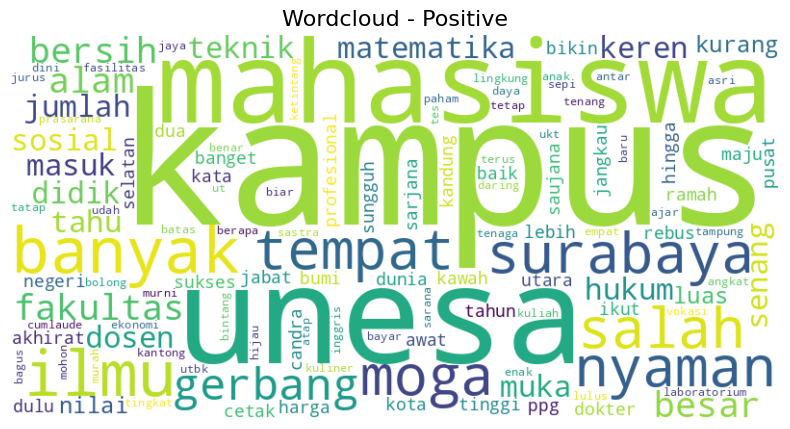

In [ ]:
wordcloud(df_pred_ktt, 'positive')

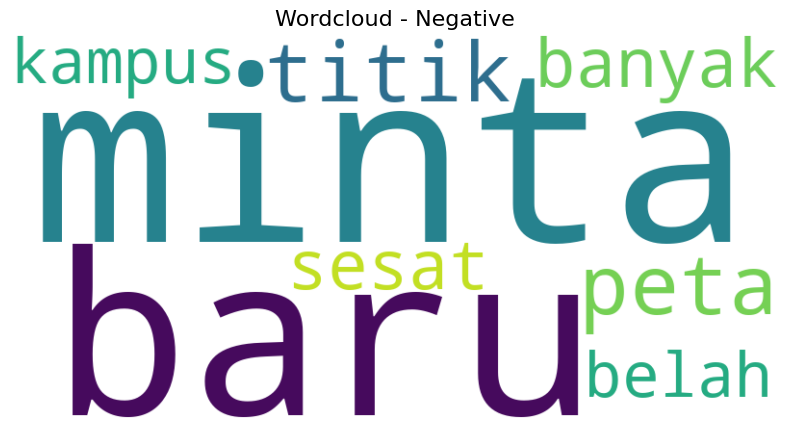

In [ ]:
wordcloud(df_pred_ktt, 'negative')

### Kata yang paling sering muncul

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
def plot_top_words(df, sentiment_label, n=15):
    subset = df[df['pred_sentiment'] == sentiment_label]
    vectorizer = CountVectorizer()  # stopword removal sudah dilakukan sebelumnya
    X = vectorizer.fit_transform(subset['review_clean'])

    word_counts = X.sum(axis=0).A1
    vocab = vectorizer.get_feature_names_out()
    freq_df = pd.DataFrame({"word": vocab, "count": word_counts}).sort_values(by="count", ascending=False).head(n)

    plt.figure(figsize=(10,5))
    plt.barh(freq_df['word'], freq_df['count'])
    plt.gca().invert_yaxis()
    plt.title(f"Top {n} Words - {sentiment_label.capitalize()}", fontsize=16)
    plt.xlabel("Frequency")
    plt.show()

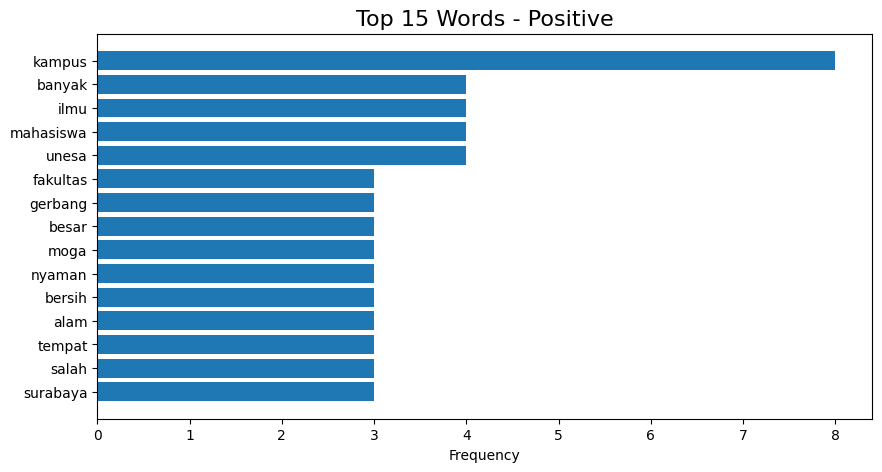

In [ ]:
plot_top_words(df_pred_ktt, 'positive')

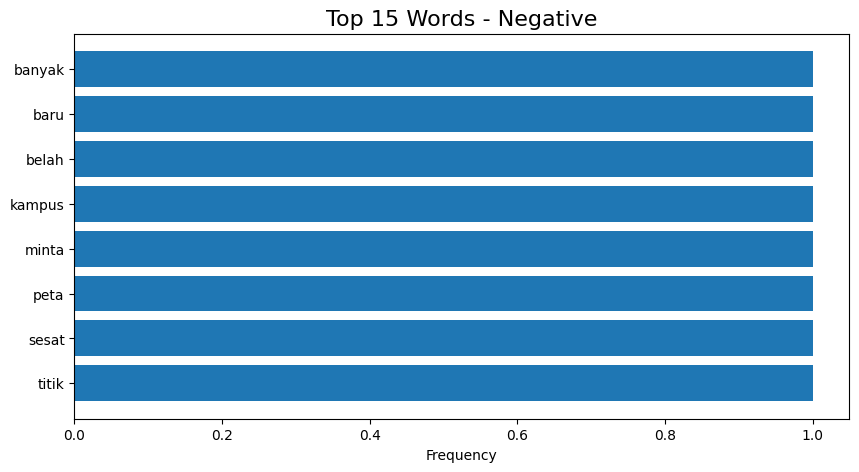

In [ ]:
plot_top_words(df_pred_ktt, 'negative')

## Kampus 2 Lidah Wetan

### WordCloud

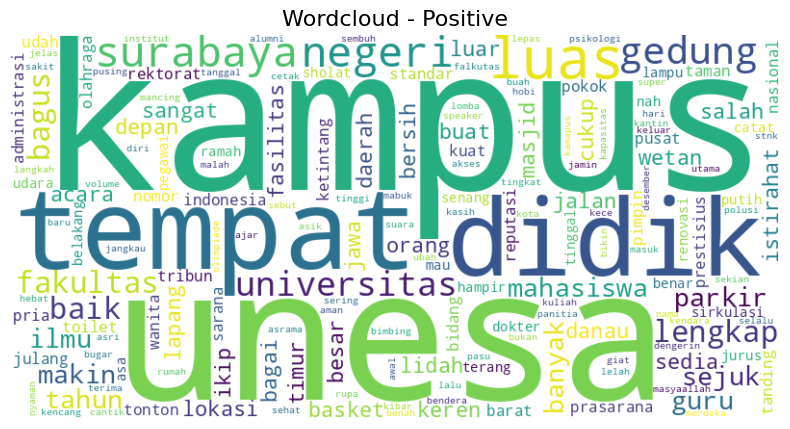

In [ ]:
wordcloud(df_pred_lw, 'positive')

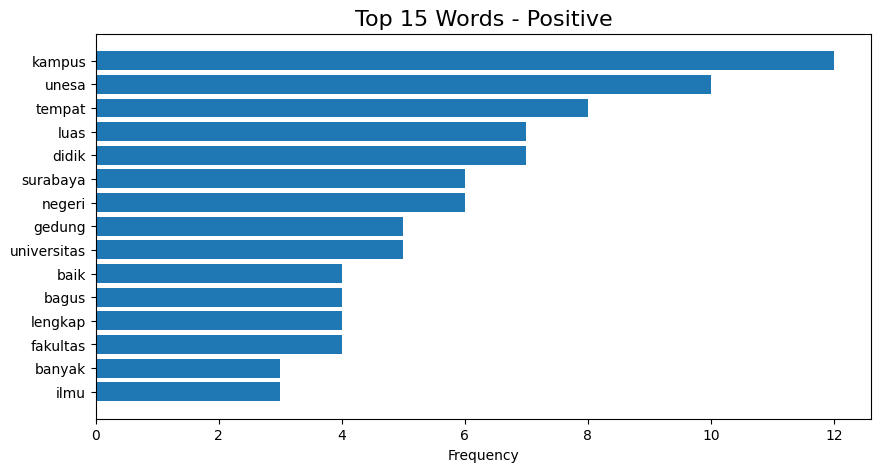

In [ ]:
plot_top_words(df_pred_lw, 'positive')